In [76]:
iteration = 5
cmd_num = [100000, 200000, 400000, 600000]
hot_key_fractions = [0.01, 0.05, 0.1, 0.2]
hot_rates = [0.01, 0.7, 0.8, 0.9]
hit_rates = [0.1, 0.2, 0.6, 0.8, 0.99]
read_fractions = [0.1, 0.2, 0.4, 0.6, 0.8, 0.99]


def argument_generator():
    '''calculate cmd on the fly'''
    for hot_key_fraction in hot_key_fractions:
        for hot_rate in hot_rates:
            for hit_rate in hit_rates:
                for read_fraction in read_fractions:
                    yield [
                        cmd_num,
                        hot_key_fraction,
                        hot_rate,
                        hit_rate,
                        read_fraction
                    ]

In [95]:
import matplotlib.pyplot as plt
import numpy as np

def plot_curves(
    x, y, labels, title,
    save_name, x_label, y_label,
    legend_label
):
    plt.rcParams['font.family'] = 'serif'
    # plt.rcParams['font.serif'] = 'libertine'
    fig, ax = plt.subplots(figsize=(15,6))
    
    for i in range(len(labels)):
        if i % 4 < 2:
            continue
        # ax.plot(x, y[i], label=labels[i], marker='o')
        
        if i < len(labels)/2:
            ax.plot(x, y[i], label=labels[i], marker='o')
            # ax.scatter(x, y[i])
        else:
            ax.plot(x, y[i], label=labels[i], linestyle='--', marker='x')
            # ax.scatter(x, y[i], marker='x')

    ax.legend(loc='best', fontsize=13)
    # ax.set_title(title, fontsize=17)
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.set_ylim(bottom=0)
    # plt.xticks(ticks=np.arange(len(labels)), labels=labels)
    plt.tick_params(axis='x', which='both', labelsize=15)
    plt.tick_params(axis='y', which='both', labelsize=14)
    
    # for i, txt in enumerate(acc):
    #     plt.annotate(f"{acc[i]:.4}", (i, acc[i]))
    
    plt.savefig(f"{save_name}")
    # plt.show()

In [ ]:
import os

TYPE_NUM = 2
ITERATION = iteration
DIM = 4 # 0: throughput, 1: duration, 2: memory usage, 3: minimum memory usage

exp_path = [
    f"./eval/correct/10w", 
    f"./eval/correct/20w", 
    f"./eval/correct/40w", 
    # f"./eval/correct/60w"，
]

def loadData(path, cmdNum):
    data = np.zeros(
        (
            len(hot_key_fractions),
            len(hot_rates),
            len(hit_rates),
            len(read_fractions),
            TYPE_NUM,
            ITERATION,
            DIM
        )
    )

    dirList = os.listdir(path)
    dirList.sort()
   
    for i, filename in enumerate(dirList):
        if ".npy" not in filename:
            continue
        args = filename.split('-')
        args[-1] = args[-1].split('.')[0]
        args = [float(i) for i in args]

        idx = (
            hot_key_fractions.index(args[1]), 
            hot_rates.index(args[2]), 
            hit_rates.index(args[3]), 
            read_fractions.index(args[4])
        )

        try:
            buf = np.load(f"{path}/{filename}")
            buf = np.append(buf, np.full((TYPE_NUM, ITERATION, 1), args[-1]), axis=-1)
            buf[:, :, 2] = args[-1] / buf[:, :, 2]
            data[idx] = buf
        except:
            print(f"File {path}/{filename} not found")
        print(f"File {path}/{filename} loaded")

    return data

allData = []
for idx, path in enumerate(exp_path):
    allData.append(loadData(path, cmd_num[idx]))


In [90]:
for i in allData:
    print(i.shape)

(4, 4, 5, 6, 2, 5, 4)
(4, 4, 5, 6, 2, 5, 4)
(4, 4, 5, 6, 2, 5, 4)


[0.1, 0.2, 0.4, 0.6, 0.8, 0.99]
[[0.01, 0.2], [0.01, 0.9], [0.1, 0.99]]
[0.1, 0.2, 0.4, 0.6, 0.8, 0.99]
[[0.01, 0.2], [0.01, 0.9], [0.1, 0.99]]
[0.1, 0.2, 0.4, 0.6, 0.8, 0.99]
[[0.01, 0.2], [0.01, 0.9], [0.1, 0.99]]
[0.1, 0.2, 0.4, 0.6, 0.8, 0.99]
[[0.01, 0.2], [0.01, 0.9], [0.1, 0.99]]
[0.1, 0.2, 0.4, 0.6, 0.8, 0.99]
[[0.01, 0.2], [0.01, 0.9], [0.1, 0.99]]
[0.1, 0.2, 0.4, 0.6, 0.8, 0.99]
[[0.01, 0.2], [0.01, 0.9], [0.1, 0.99]]


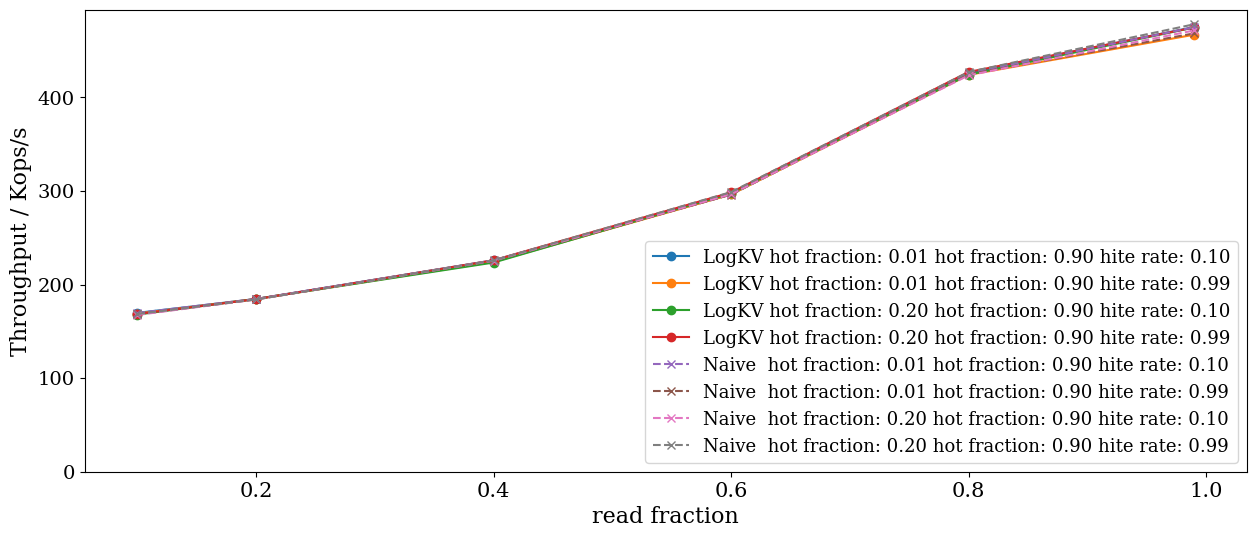

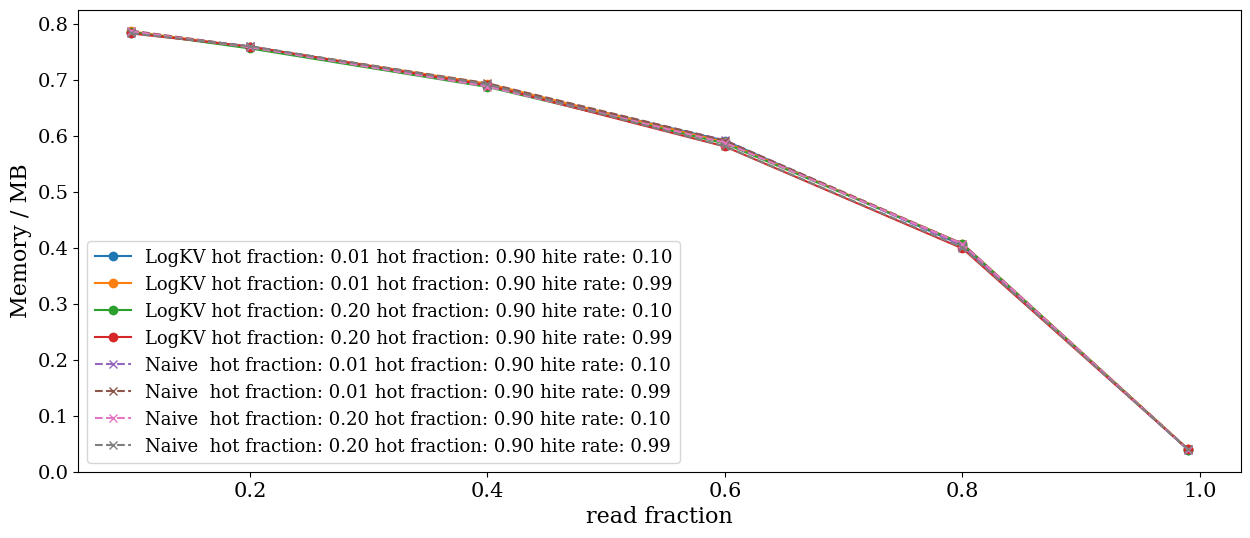

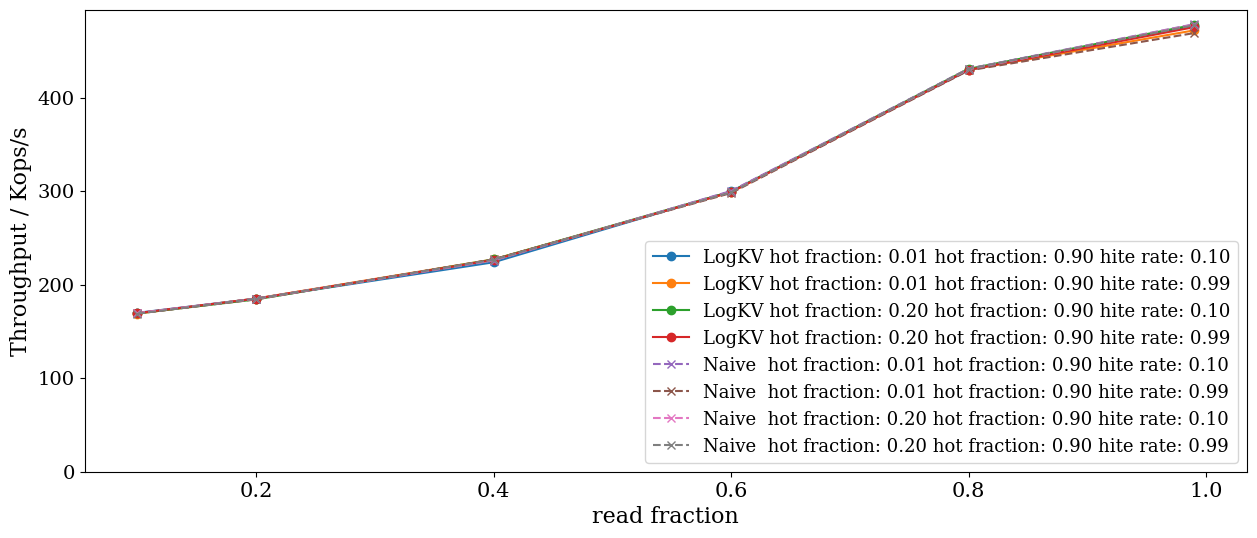

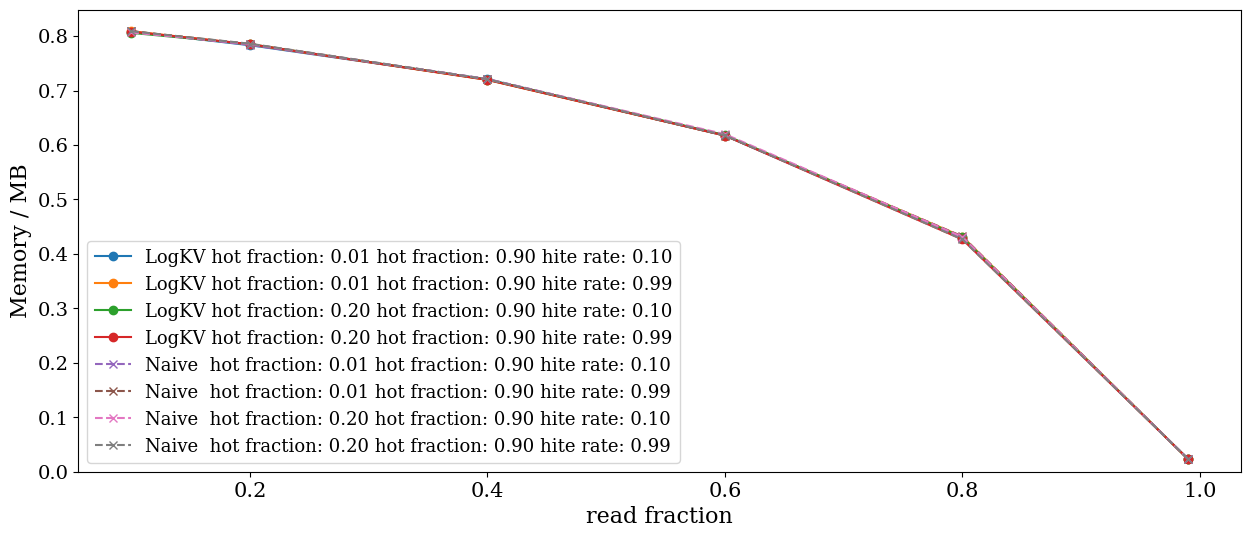

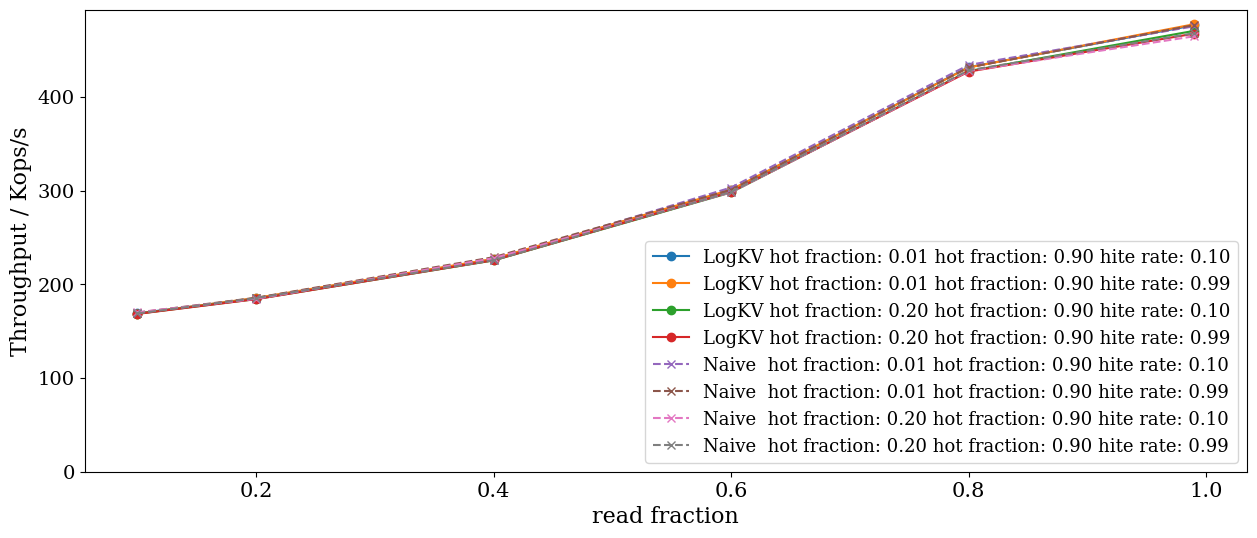

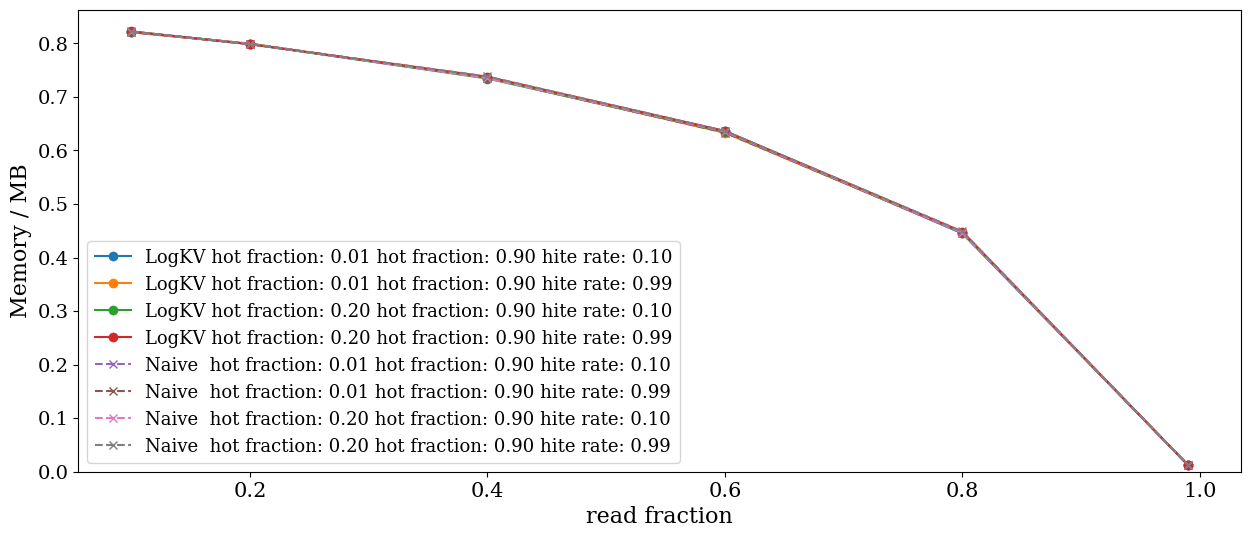

In [96]:

plotInfo = {
    "varaible": None,
    "fixed": None,
    "varName": None,
    "fixedNames": None,
    "rawdata": None,
    "scale": None,
    "metric_dim_idx": None,
    "save_path": None,
    "varUnit": None
}

def analysis(varaible, fixed, varName, fixedNames, rawdata, scale, metric_dim_idx, save_path, metricName, metricUnit, cmdNum):
    log_data = []
    naive_data = []
    log_labels = []
    naive_labels = []
    print(varaible)
    print(fixed)

    for i1, val1 in enumerate(fixed[0]):
        for i2, val2 in enumerate(fixed[1]):
            for i3, val3 in enumerate(fixed[2]):                
                metric = rawdata[i1, i2, i3, :, :, :, metric_dim_idx] / scale
                metric = np.sum(metric, axis = 2) / metric.shape[2]
                # memory = rawdata[i1, i2, i3, :, :, :, 2]
                # memory = np.sum(memory, axis = 2) / memory.shape[2]

                log_data.append(metric[:, 0].flatten())
                naive_data.append(metric[:, 1].flatten())
                # log_mem.append(memory[:, 0].flatten())
                # naive_mem.append(memory[:, 1].flatten())
                log_labels.append(f"LogKV {fixedNames[0]}: {val1:.2f} {fixedNames[0]}: {val2:.2f} {fixedNames[2]}: {val3:.2f}")
                naive_labels.append(f"Naive  {fixedNames[0]}: {val1:.2f} {fixedNames[0]}: {val2:.2f} {fixedNames[2]}: {val3:.2f}")

    # log_data = log_data[1:]
    # naive_data = naive_data[1:]
    # log_labels = log_labels[1:]
    # naive_labels = naive_labels[1:]
    all_data = log_data + naive_data
    all_labels = log_labels + naive_labels

    # print(len(log_data))
    # for i, val in enumerate(log_data):
    #     plot_curves(
    #         varaible, [log_data[i]], [log_labels[i]], 
    #         f"{varName} vs. read fraction ({cmdNum} Commands)",
    #         f"{save_path}/../{metricName}_{cmdNum}_log.png",
    #         "read fraction", f"{metricName} / {metricUnit}", f"{metricUnit}"
    #     )

    plot_curves(
        varaible, all_data, all_labels, 
        f"{varName} ({cmdNum} Commands)",
        f"{save_path}/../{metricName}_{cmdNum}_All.png",
        "read fraction", f"{metricName} / {metricUnit}", f"{metricUnit}"
    )
    # plot_curves(
    #     varaible, log_data, log_labels, 
    #     f"{varName} vs. read fraction ({cmdNum} Commands)",
    #     f"{save_path}/../{metricName}_{cmdNum}_log.png",
    #     "read fraction", f"{metricName} / {metricUnit}", f"{metricUnit}"
    # )
    # plot_curves(
    #     varaible, naive_data, naive_labels, 
    #     f"{varName} vs. read fraction ({cmdNum} Commands)",
    #     f"{save_path}/../{metricName}_{cmdNum}_naive.png",
    #     "read fraction", f"{metricName} / {metricUnit}", f"{metricUnit}"
    # )
                

all_factors = [
    hot_key_fractions,
    hot_rates,
    hit_rates,
    read_fractions
]
all_names = {
    0: "hot fraction",
    1: "hot rate",
    2: "hite rate",
    3: "read fraction",
}
throughputScale = 1000
memoryScale = 1

# rawdata = np.swapaxes(data, 0, 1)
# rawdata = np.swapaxes(rawdata, 1, 2)
# rawdata = np.swapaxes(rawdata, 2, 3)
for exp_idx, rawdata in enumerate(allData):

    analysis(
        all_factors[3], 
        [ [vec[0], vec[-1]] for vec in all_factors[:3] ],   # take the first and last element of each vector
        # all_factors[:3],
        all_names[3], 
        [all_names[0], all_names[1], all_names[2]],
        rawdata, throughputScale, 0, exp_path[exp_idx], "Throughput", "Kops/s",
        cmd_num[exp_idx]
    )
    analysis(
        all_factors[3], 
        [ [vec[0], vec[-1]] for vec in all_factors[:3] ],   # take the first and last element of each vector
        # all_factors[:3],
        all_names[3], 
        [all_names[0], all_names[1], all_names[2]],
        rawdata, memoryScale, 2, exp_path[exp_idx], "Memory", "MB",
        cmd_num[exp_idx]
    )

    # break


In [66]:
cmd_num = 1000000
hot_key_fractions = [0.00, 0.20]
hot_rates = [0.00, 0.60]
hit_rates = [0.95]
read_fractions = [0.20, 0.8]
exp_path = f"{resPath}/100w"

TYPE_NUM = 2
ITERATION = iteration
DIM = 3

filenames = [
    "1000000-0.00-0.00-0.95-0.20.npy",
    "1000000-0.00-0.00-0.95-0.80.npy",
    "1000000-0.20-0.60-0.95-0.20.npy",
    "1000000-0.20-0.60-0.95-0.80.npy",
]

data = []
for path in filenames:
    data.append(np.load(f"./eval/100w/data/{path}"))
data = np.array(data)
print(data.shape)
print(data)

throughput = data[:, :, :, 0] / throughputScale
memory = data[:, :, :, 2]
throughput = np.sum(throughput, axis = 2) / throughput.shape[2]
memory = np.sum(memory, axis = 2) / memory.shape[2]

log_throu = []
naive_throu = []
log_mem = []
naive_mem = []
log_labels = []
naive_labels = []

log_throu.append(throughput[0:2, 0].flatten())
log_throu.append(throughput[2:4, 0].flatten())
naive_throu.append(throughput[0:2, 1].flatten())
naive_throu.append(throughput[2:4, 1].flatten())
log_mem.append(memory[0:2, 0].flatten())
log_mem.append(memory[2:4, 0].flatten())
naive_mem.append(memory[0:2, 1].flatten())
naive_mem.append(memory[2:4, 1].flatten())
for i in range(2):
    log_labels.append(f"LogKV: {filenames[i+1][0:-9]}")
    naive_labels.append(f"Naive: {filenames[i+1][0:-9]}")


all_data = log_throu + naive_throu
all_labels = log_labels + naive_labels
variable = read_fractions
varName = "read_frac"
print(all_data)

# plot_curves(
#     variable, all_data, all_labels, 
#     "Throughput vs. Read Fraction",
#     f"{exp_path}/TPvsRF.png",
#     varName, "throughput / Kops/ms", "ops/ms"
# )
# plot_curves(
#     variable, log_throu, log_labels, 
#     "Throughput vs. Read Fraction",
#     f"{exp_path}/logTPvsRF.png",
#     varName, "throughput / Kops/ms", "ops/ms"
# )
# plot_curves(
#     variable, naive_throu, naive_labels, 
#     "Throughput vs. Read Fraction",
#     f"{exp_path}/naiveTPvsRF.png",
#     varName, "throughput / Kops/ms", "ops/ms"
# )

all_data = log_mem + naive_mem
all_labels = log_labels + naive_labels
print(all_data)

# plot_curves(
#     variable, all_data, all_labels, 
#     "Memory vs. Read Fraction",
#     f"{exp_path}/MemvsRF.png",
#     varName, "memory / bytes", "Bytes"
# )
# plot_curves(
#     variable, log_mem, log_labels, 
#     "Memory vs. Read Fraction",
#     f"{exp_path}/logMemvsRF.png",
#     varName, "memory / Bytes", "Bytes"
# )
# plot_curves(
#     variable, naive_mem, naive_labels, 
#     "Memory vs. Read Fraction",
#     f"{exp_path}/naiveMemvsRF.png",
#     varName, "memory / bytes", "Bytes"
# )



(4, 2, 5, 3)
[[[[1.87488261e+05 5.33900094e+00 4.65698816e+08]
   [1.86831704e+05 5.35776305e+00 4.65842176e+08]
   [1.87143965e+05 5.34882331e+00 4.65805312e+08]
   [1.86799701e+05 5.35868096e+00 4.65846272e+08]
   [1.86673698e+05 5.36229801e+00 4.65694720e+08]]

  [[1.87406405e+05 5.34133291e+00 4.65735680e+08]
   [1.87262275e+05 5.34544396e+00 4.65780736e+08]
   [1.87414428e+05 5.34110427e+00 4.65764352e+08]
   [1.86327067e+05 5.37227368e+00 4.65801216e+08]
   [1.87237389e+05 5.34615445e+00 4.65625088e+08]]]


 [[[1.01909185e+05 9.82247090e+00 3.96374016e+08]
   [9.29529751e+04 1.07688861e+01 3.96365824e+08]
   [1.07605435e+05 9.30250406e+00 3.96365824e+08]
   [8.82601081e+04 1.13414772e+01 3.96378112e+08]
   [7.68081499e+04 1.30324712e+01 3.86162688e+08]]

  [[9.91270677e+04 1.00981500e+01 3.96349440e+08]
   [1.01559236e+05 9.85631680e+00 3.96345344e+08]
   [1.01733599e+05 9.83942389e+00 3.96345344e+08]
   [1.00114649e+05 9.99853683e+00 3.96345344e+08]
   [1.00527284e+05 9.95749569

In [40]:
print(data.shape)
print(len(data.shape))
print(np.sum(data, axis=5).shape)
print(data[0,0,0,:,:,:,0].shape)
print(np.sum(data[0,0,0,:,:,:,0], axis=2) / data[0,0,0,:,:,:,0].shape[2])


(2, 2, 1, 2, 2, 5, 3)
7
(2, 2, 1, 2, 2, 3)
(2, 2, 5)
[[186987.46557917 187129.51289983]
 [ 93507.17060501 100612.36690889]]


In [89]:
data = np.load(f"./eval/100w/data/1000000-0.20-0.60-0.95-0.10-423885056.npy")
print(data)
throughput = data[:, :, 0] / throughputScale
memory = data[:, :, 2]
throughput = np.sum(throughput, axis = 1) / throughput.shape[1]
memory = np.sum(memory, axis = 1) / memory.shape[1]
print(throughput)
print(memory)

print(throughput[0]/throughput[1])
print(memory[0]/memory[1])

[[[1.66234473e+05 6.02161503e+00 5.10275584e+08]
  [1.66130242e+05 6.02539301e+00 5.10443520e+08]
  [1.66091756e+05 6.02678919e+00 5.10328832e+08]
  [1.65502804e+05 6.04823589e+00 5.10423040e+08]
  [1.65586295e+05 6.04518628e+00 5.10279680e+08]]

 [[1.65794603e+05 6.03759098e+00 5.10324736e+08]
  [1.65483521e+05 6.04894066e+00 5.10210048e+08]
  [1.65488916e+05 6.04874349e+00 5.10210048e+08]
  [1.65356534e+05 6.05358601e+00 5.10222336e+08]
  [1.64779792e+05 6.07477403e+00 5.10353408e+08]]]
[165.90911409 165.38067314]
[5.10350131e+08 5.10264115e+08]
1.0031953004747394
1.000168571524898
